<a href="https://colab.research.google.com/github/Rus-Senator/education/blob/master/%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ данных

**Перед началом работы необходимо скачать данные!!!**



In [ ]:
!wget https://raw.githubusercontent.com/Rus-Senator/education/master/Данные.csv

--2024-03-24 09:28:48--  https://raw.githubusercontent.com/Rus-Senator/education/master/%D0%94%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1210305 (1.2M) [text/plain]
Saving to: ‘Данные.csv’

Данные.csv          100%[===================>]   1.15M  --.-KB/s    in 0.05s   

2024-03-24 09:28:48 (21.1 MB/s) - ‘Данные.csv’ saved [1210305/1210305]



Подключим библиотеки:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

Загрузим таблицу в Pandas:

In [ ]:
df = pd.read_csv('Данные.csv')

Отобразим таблицу:

In [ ]:
df

,TIME,OPEN(T),HIGH(t),LOW(t),CLOSE(t)
0,10:00:00,87120,87380,87120,87360
1,10:00:01,87320,87370,87270,87310
2,10:00:02,87310,87370,87290,87320
3,10:00:03,87340,87340,87280,87300
4,10:00:04,87300,87350,87240,87290
...,...,...,...,...,...
35591,23:49:55,87020,87070,87020,87070
35592,23:49:56,87030,87030,87000,87000
35593,23:49:57,87000,87060,86980,87070
35594,23:49:58,86980,87060,86970,86970


Зададим имя колонки для построения распределения:

In [ ]:
col_name = 'OPEN(T)'

Для начала воспользуемся готовым пакетом, он делает всю работу буквально в пару строчек, но для понимания процесса подготовки данных не подходит:

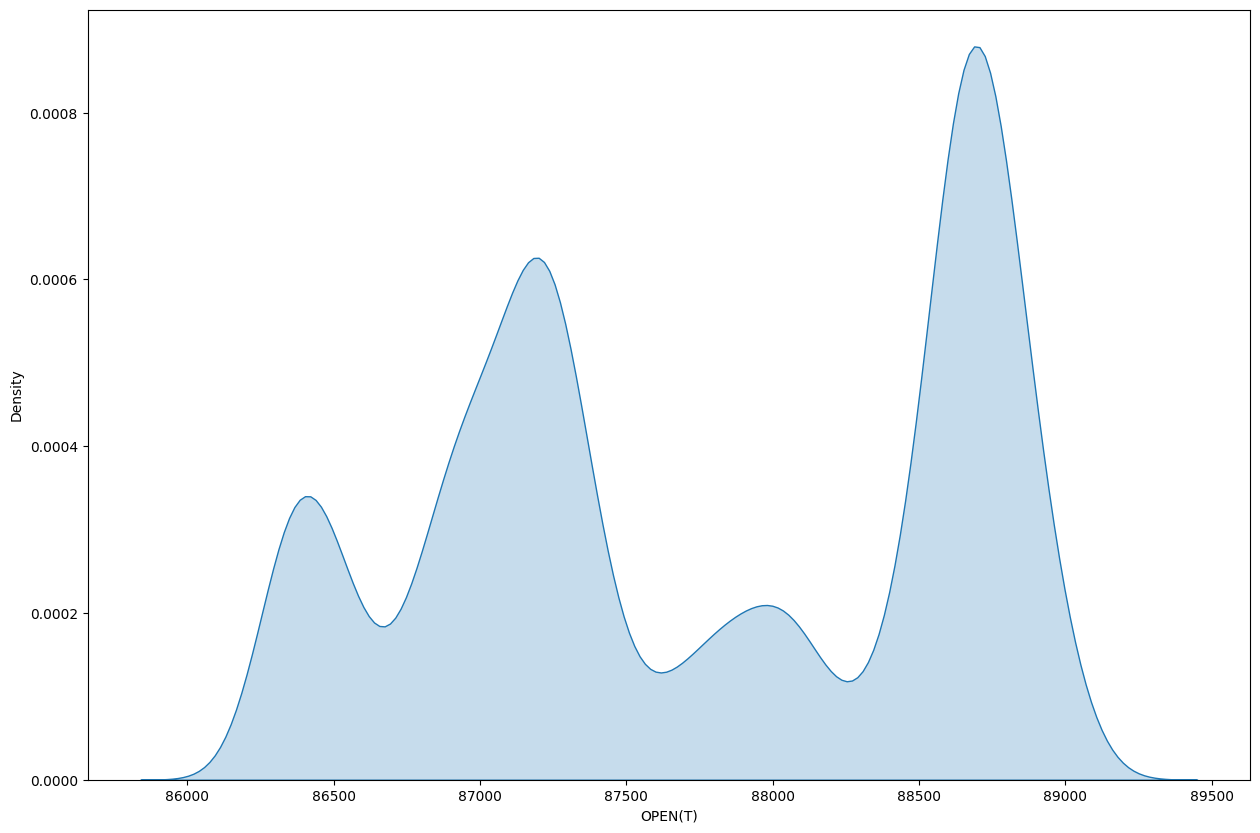

In [ ]:
plt.figure(figsize = (15,10))
sb.kdeplot(df[col_name] ,fill = True)
plt.show()

Теперь подготовим данные самостоятельно. Определим число интервалов для величины, а также определим минимальный и максимальный элемент:

In [ ]:
N = 10

In [ ]:
min_val = df[col_name].min()

In [ ]:
max_val = df[col_name].max()

In [ ]:
print(min_val, max_val)

86160 89130


Ширина каждого интервала:

In [ ]:
width = (max_val - min_val)/N

Создадим массив NumPy, в нем будет сначала число элементов из каждого интервала, а затем вероятность попадания:

In [ ]:
density = np.zeros(N)

Перебираем все элементы. Номер интервала легко найти через формулу. Поскольку в каждом интервале правая граница не включена, элемент max_val необходимо руками включить в последний интервал:

In [ ]:
for row in df[col_name]:
    if row == max_val:
      density[N-1] += 1
    else:
      i = int((row - min_val) / width)
      if i < N:
          density[i] += 1


Делим число вхождений в интервал на общее число элементов:

In [ ]:
density = density/len(df[col_name])


Строим график:

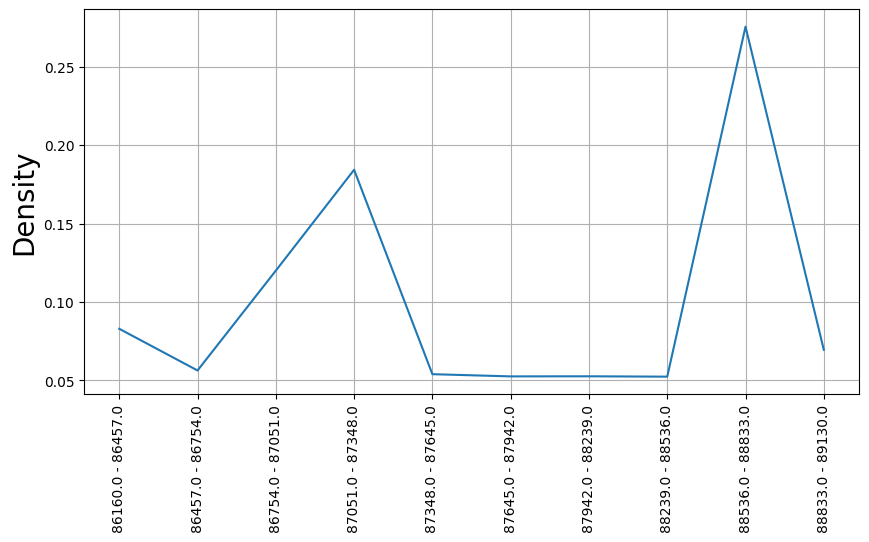

In [ ]:
plt.figure(figsize=(10, 5))
x = [min_val+i*width for i in range(N)]
plt.ylabel('Density', size=20) # подпись оси OX (r - raw строки, отключает экранирование символов)
plt.plot(x, density) # В качестве координаты X берем сам вектор, а в качестве Y - возводим его во 2 степень
plt.grid(True)  # Отобразим сетку
plt.xticks(x, [f'{min_val+i*width} - {min_val+(i+1)*width}' for i in range(N)], rotation=90)
plt.show() # Рисуем график

Исходные данные:

In [ ]:
density

array([0.08290257, 0.05632655, 0.1199573 , 0.18426228, 0.05396674,
       0.05256209, 0.05261827, 0.05239353, 0.27548039, 0.06953028])

Данные по интервалам. В последний интервал руками включена правая граница:

In [ ]:
for i in range(N):
    print(f'[{min_val+i*width} - {min_val+(i+1)*width}) : {density[i]}')

[86160.0 - 86457.0) : 0.08290257332284526
[86457.0 - 86754.0) : 0.056326553545342176
[86754.0 - 87051.0) : 0.11995729857287335
[87051.0 - 87348.0) : 0.1842622766602989
[87348.0 - 87645.0) : 0.053966737835711875
[87645.0 - 87942.0) : 0.052562085627598606
[87942.0 - 88239.0) : 0.052618271715923134
[88239.0 - 88536.0) : 0.052393527362625016
[88536.0 - 88833.0) : 0.27548039105517474
[88833.0 - 89130.0) : 0.06953028430160692


Проверка, что сумма по всем вероятностям = 1:

In [ ]:
sum(density)

1.0